In [48]:
# Data Manipulation
import numpy as np
import pandas as pd
import re
from pandas_profiling import ProfileReport
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings("ignore")  # Hiding the warnings

# Feature Engineering
from lazypredict.Supervised import LazyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2 
from sklearn.model_selection import *  
from sklearn.preprocessing import MinMaxScaler

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import *

# Model evaluation
from sklearn import metrics
from sklearn.metrics import *

print("Loading complete.", "Warnings hidden.")

Loading complete. Warnings hidden.


## Data Exploration

In [3]:
# Loading the data
dataset = pd.read_csv(r"C:\Users\USER1\Desktop\adult.csv")
dataset.shape

(32561, 15)

In [4]:
dataset.head(5)

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [5]:
dataset.tail(5)

age workclass  fnlwgt     education  education.num      marital.status  \
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K

In [6]:
# Looking at information about the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Summary of Data
dataset.describe()

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [8]:
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [9]:
# Restrict column names to alphanumeric characters with underscore separator
dataset.rename(columns= lambda x: re.sub("[^A-Za-z0-9_]+", "_", x), inplace= True)
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [10]:
# Exploring Data
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
# from inspection, missing values were autofilled with "?"
# Replace the missing values
print(dataset.shape)
dataset.drop(dataset[dataset.values == "?"].index, inplace=True)

# Confirm the replacements
dataset.shape

(32561, 15)


(30162, 15)

In [12]:
# How many are the duplicates?
dataset[dataset.duplicated()].shape

(23, 15)

In [13]:
# Drop the duplicates
dataset.drop_duplicates(inplace = True, ignore_index=True)

# Confirm removal of duplicates
dataset[dataset.duplicated()]

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income]
Index: []

In [14]:
print(dataset['income'].value_counts())

<=50K    22633
>50K      7506
Name: income, dtype: int64


In [15]:
# Is the dataset imbalanced?
minority_length, minority_width = dataset[dataset["income"] == ">50K"].shape
majority_length, majority_width = dataset[dataset["income"] == "<=50K"].shape

minority_percent = 100*minority_length/(minority_length+majority_length)
minority_percent

24.904608646604068

In [16]:
profile = ProfileReport(dataset)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
# Looking at the unique values in each column
dataset.nunique()

age                  72
workclass             7
fnlwgt            20263
education            16
education_num        16
marital_status        7
occupation           14
relationship          6
race                  5
sex                   2
capital_gain        118
capital_loss         90
hours_per_week       94
native_country       41
income                2
dtype: int64

In [18]:
# Encoding the income column
dataset["income"].replace({">50K":1, "<=50K":0}, inplace= True)

In [19]:
dataset['workclass'].replace(['Private','Self-emp-not-inc','Local-gov','State-gov','Self-emp-inc','Federal-gov','Without-pay',
                       'Never-worked'],
                        [0, 1,2,3,4,5,6,7], inplace=True)

In [20]:
dataset['marital_status'].replace(['Married-civ-spouse','Never-married','Divorced','Separated','Widowed','Married-spouse-absent'
,'Married-AF-spouse'],
                        [0, 1,2,3,4,5,6], inplace=True)

In [21]:
dataset['occupation'].replace(['Prof-specialty','Craft-repair','Exec-managerial','Adm-clerical','Sales','Other-service',
                          'Machine-op-inspct','Transport-moving','Handlers-cleaners','Farming-fishing','Tech-support', 
                          'Protective-serv','Priv-house-serv','Armed-Forces'],
                        [0, 1,2,3,4,5,6,7,8,9,10,11,12,13], inplace=True)

In [22]:
dataset['race'].replace(['White','Black','Asian-Pac-Islander','Amer-Indian-Eskimo','Other'],
                        [0, 1,2,3,4], inplace=True)

In [23]:
dataset['sex'].replace(['Male','Female'],
                        [0, 1], inplace=True)

In [24]:
dataset['native_country'].replace(['United-States','Mexico','Philippines','Germany','Canada','Puerto-Rico','El-Salvador','India',
                              'Cuba','England','Jamaica','South','China','Italy','Dominican-Republic','Vietnam','Guatemala',
                              'Japan','Poland','Columbia','Taiwan','Haiti','Iran','Portugal','Nicaragua','Peru','Greece','France', 
                             'Ecuador','Ireland','Hong','Cambodia','Trinadad&Tobago','Laos','Thailand','Yugoslavia','Outlying-US(Guam-USVI-etc)',
                              'Hungary','Honduras','Scotland','Holand-Netherlands'],
                            [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40],inplace=True)

In [25]:
dataset.dtypes

age                int64
workclass          int64
fnlwgt             int64
education         object
education_num      int64
marital_status     int64
occupation         int64
relationship      object
race               int64
sex                int64
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country     int64
income             int64
dtype: object

In [26]:
complete_set = dataset.drop(columns=['relationship','education','workclass']) 

<AxesSubplot:>

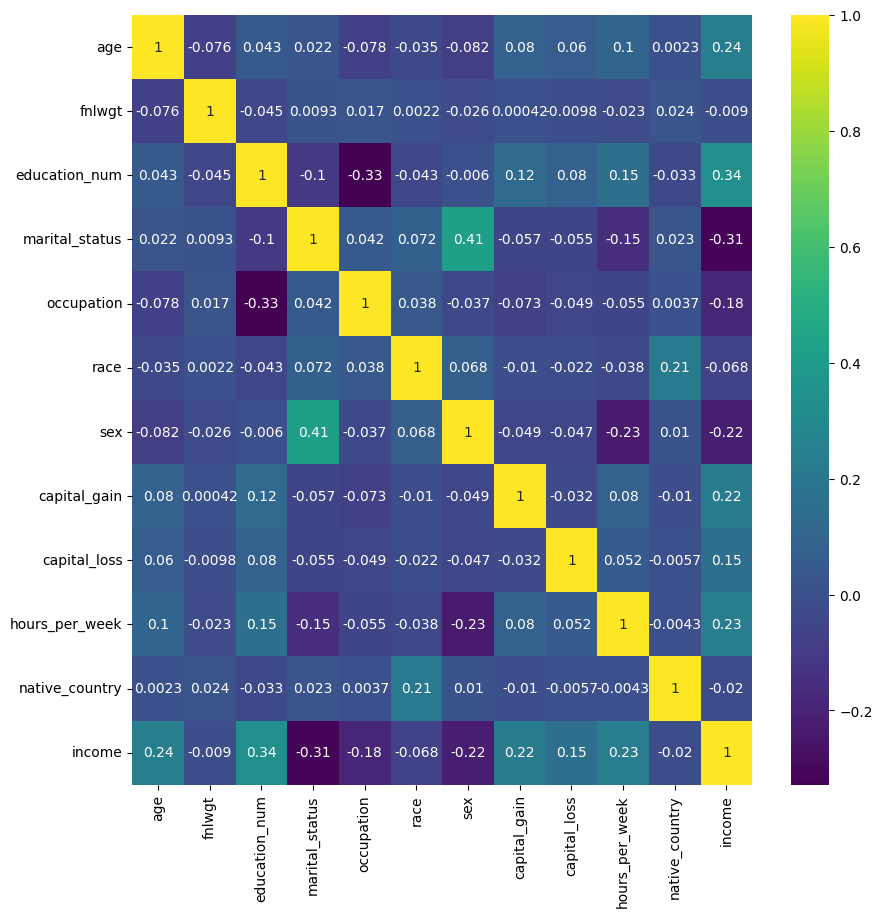

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(complete_set.corr(), annot = True, cmap = 'viridis')

In [28]:
# Defining the target & predictor variables
X = complete_set.drop(columns=["income"])
y = complete_set["income"]

# Splitting the dataframe into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 1, stratify= y)

In [29]:
# Putting the training dataset together for further splitting and modelling
train_data = X_train.join(y_train, on=X_train.index)
train_data.head()

age  fnlwgt  education_num  marital_status  occupation  race  sex  \
177     49  102359              5               4           8     0    0   
23605   43  152617             10               2           3     0    1   
26519   19  196119              9               1           4     0    1   
19434   52  110563             10               0           2     0    0   
17757   42  326083             11               0           0     0    0   

       capital_gain  capital_loss  hours_per_week  native_country  income  
177               0          2231              40               0       1  
23605             0             0              40               0       0  
26519             0             0              35               0       0  
19434             0             0              40               0       1  
17757             0             0              40               0       0

In [30]:
train_data.shape

(24111, 12)

In [31]:
# Putting the training dataset together for future model evaluation
test_data = X_test.join(y_test, on=X_test.index)
test_data.head()

age  fnlwgt  education_num  marital_status  occupation  race  sex  \
22461   38   70995              9               2           0     0    0   
11773   78  180239             14               4           1     2    0   
11561   37  161111             13               1           4     0    1   
29825   44  157217             13               1           4     0    0   
27504   32  206541             11               0          10     0    0   

       capital_gain  capital_loss  hours_per_week  native_country  income  
22461             0             0              45               0       0  
11773             0             0              40              11       0  
11561             0             0              40               0       0  
29825             0             0              42               0       0  
27504             0             0              45               0       1

In [32]:
test_data.shape

(6028, 12)

In [33]:
# Splitting the training dataframe for the SMOTE balancing
X = train_data.drop(columns=["income"])
y = train_data["income"]

In [34]:
# Resampling the dataframe using SMOTE
smote = SMOTE(sampling_strategy="auto")
X, y = smote.fit_resample(X, y)
y.value_counts()

1    18106
0    18106
Name: income, dtype: int64

In [35]:
# Splitting the dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24, stratify=y)
y_train.value_counts()

1    13580
0    13579
Name: income, dtype: int64

In [36]:
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
#check the best model
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

 38%|███▊      | 11/29 [00:31<00:43,  2.44s/it]

In [37]:
# Instantiate the models
log_reg_model = LogisticRegression(random_state=1)
dt_model = DecisionTreeClassifier(random_state=1)
rf_model = RandomForestClassifier(random_state=1)
knn_model = KNeighborsClassifier(n_neighbors = 5)
svm_model = SVC(random_state=1)
Naive_model = GaussianNB()
lgb_model = lgb.LGBMClassifier(random_state=1)
xgb_model = XGBClassifier(random_state=1)



In [38]:
# Create a dictionary of models
models = {
    "Logistic Regressor": log_reg_model,
    "Decision Tree Classifier": dt_model,
    "Random Forest Model": rf_model,
    "K Neighbor Nearest Algorithm": knn_model,
    "Support Vector Machine": svm_model,
    "Naive Bayes Algorithm": Naive_model,
    "LightGBM": lgb_model,
    "XGBoost": xgb_model
}

In [39]:
# Defining a helper function to fit models to data and score them
def classification_fit_and_score(models, X_train= X_train, X_test= X_test, 
                                 y_train= y_train, y_test= y_test):
    
    # List to collect the results
    results = []
    
    # Looping through the models to fit and score each
    for name, model in models.items():

        # fitting to the training data
        model.fit(X_train, y_train)

        # making predictions
        y_pred = model.predict(X_test)
        
        # Append model performance results
        results.append([
        name,
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        accuracy_score(y_test, y_pred)
        ])

        # Print Classification Report
        model_classification_report = classification_report(y_test, y_pred)
        print(f"{name} Model Classification Report", "\n", model_classification_report, "\n")
        
        # Defining the Confusion Matrix
        model_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred)).reset_index(drop=True)
        print(f"{name} Confusion Matrix:", "\n", model_confusion_matrix, "\n")
        
        # Visualizing the Confusion Matrix
        # Display Confusion Matrix directly from predictions
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        plt.show()

        print("----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  -----", "\n") 
        print("----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  -----", "\n")
    
    # Put the results together
    eval_df = pd.DataFrame(results, columns=["model", "precision", "recall", "f1_score", "accuracy"])
    eval_df.set_index("model", inplace=True)

    return eval_df

Logistic Regressor Model Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.79      0.82      4527
           1       0.80      0.85      0.83      4526

    accuracy                           0.82      9053
   macro avg       0.82      0.82      0.82      9053
weighted avg       0.82      0.82      0.82      9053
 

Logistic Regressor Confusion Matrix: 
       0     1
0  3574   953
1   658  3868 



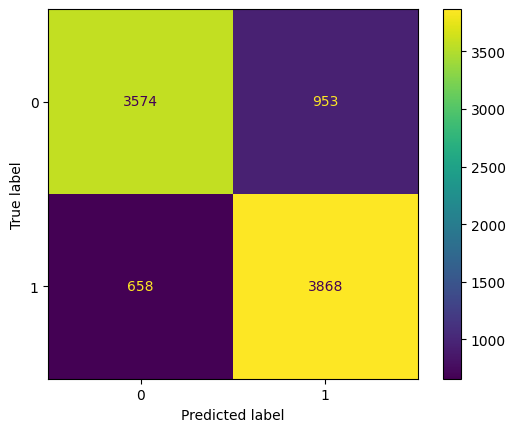

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

Decision Tree Classifier Model Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      4527
           1       0.82      0.84      0.83      4526

    accuracy                           0.83      9053
   macro avg       0.83      0.83      0.83      9053
weighted avg       0.83      0.83      0.83      9053
 

Decision Tree Classifier Confusion Matrix: 
       0     1
0  3715   812
1   737  3789 



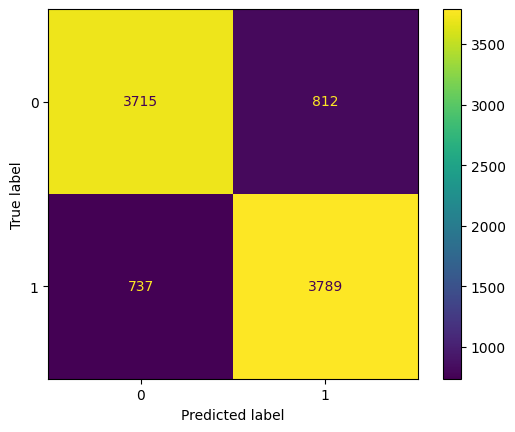

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

Random Forest Model Model Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      4527
           1       0.86      0.88      0.87      4526

    accuracy                           0.87      9053
   macro avg       0.87      0.87      0.87      9053
weighted avg       0.87      0.87      0.87      9053
 

Random Forest Model Confusion Matrix: 
       0     1
0  3878   649
1   530  3996 



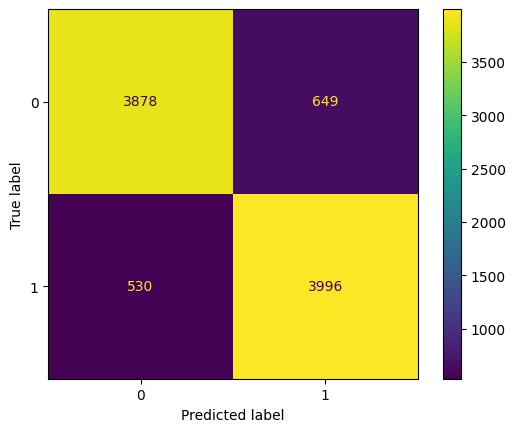

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

K Neighbor Nearest Algorithm Model Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      4527
           1       0.82      0.86      0.84      4526

    accuracy                           0.84      9053
   macro avg       0.84      0.84      0.84      9053
weighted avg       0.84      0.84      0.84      9053
 

K Neighbor Nearest Algorithm Confusion Matrix: 
       0     1
0  3684   843
1   630  3896 



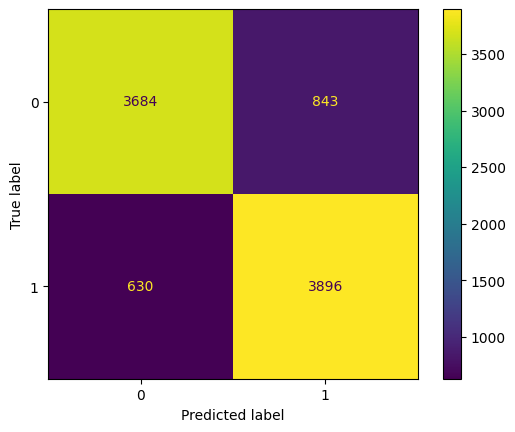

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

Support Vector Machine Model Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      4527
           1       0.81      0.90      0.85      4526

    accuracy                           0.84      9053
   macro avg       0.85      0.84      0.84      9053
weighted avg       0.85      0.84      0.84      9053
 

Support Vector Machine Confusion Matrix: 
       0     1
0  3554   973
1   466  4060 



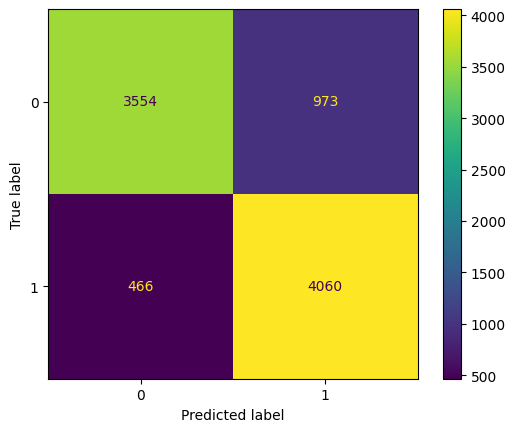

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

Naive Bayes Algorithm Model Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.88      0.80      4527
           1       0.86      0.69      0.76      4526

    accuracy                           0.78      9053
   macro avg       0.80      0.78      0.78      9053
weighted avg       0.80      0.78      0.78      9053
 

Naive Bayes Algorithm Confusion Matrix: 
       0     1
0  4002   525
1  1424  3102 



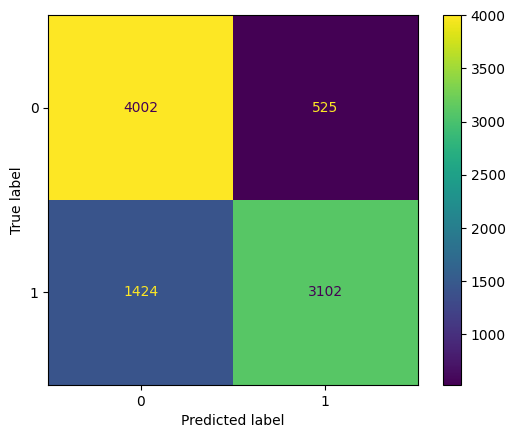

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

LightGBM Model Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.86      0.87      4527
           1       0.86      0.89      0.88      4526

    accuracy                           0.88      9053
   macro avg       0.88      0.88      0.88      9053
weighted avg       0.88      0.88      0.88      9053
 

LightGBM Confusion Matrix: 
       0     1
0  3881   646
1   478  4048 



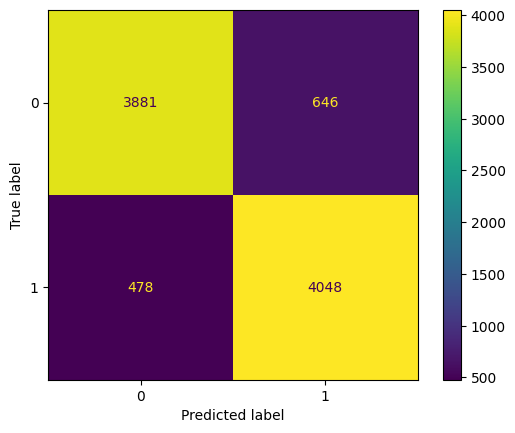

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

XGBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.86      0.88      4527
           1       0.87      0.90      0.88      4526

    accuracy                           0.88      9053
   macro avg       0.88      0.88      0.88      9053
weighted avg       0.88      0.88      0.88      9053
 

XGBoost Confusion Matrix: 
       0     1
0  3902   625
1   468  4058 



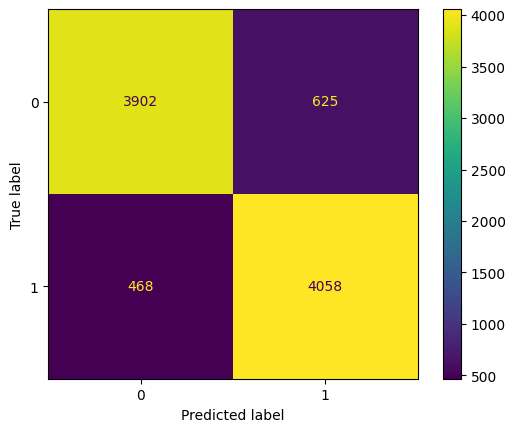

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 



precision    recall  f1_score  accuracy
model                                                                
Logistic Regressor             0.802323  0.854618  0.827645  0.822048
Decision Tree Classifier       0.823517  0.837163  0.830284  0.828896
Random Forest Model            0.860280  0.882899  0.871443  0.869767
K Neighbor Nearest Algorithm   0.822114  0.860804  0.841015  0.837292
Support Vector Machine         0.806676  0.897039  0.849461  0.841047
Naive Bayes Algorithm          0.855252  0.685373  0.760947  0.784712
LightGBM                       0.862378  0.894388  0.878091  0.875842
XGBoost                        0.866539  0.896597  0.881312  0.879267

In [40]:
model_performances = classification_fit_and_score(models)
model_performances

In [41]:
# Splitting the test data
test_X = test_data.drop(columns= ["income"])
test_y = test_data["income"]

# Resampling the dataframe using SMOTE
smote = SMOTE(sampling_strategy= "auto")
smote_X, smote_y = smote.fit_resample(test_X, test_y)
smote_y.value_counts()

0    4527
1    4527
Name: income, dtype: int64

In [42]:
# Scaling the numeric columns
smote_X = sc.transform(smote_X)

In [43]:
# Fit the top models to the training data
## LightGBM
lgb_model = lgb.LGBMClassifier(random_state=1)
lgb_model.fit(X_train, y_train)

## XGBoost
xgb_model = XGBClassifier(random_state=1)
xgb_model.fit(X_train, y_train)

# Create a dictionary of models
select_models = {
    "LightGBM": lgb_model,
    "XGBoost": xgb_model
}

In [44]:
# Defining a helper function to evaluate the models at a go
def model_evaluation(fit_models, X_test, y_test):
    lst = []
    for name, model in fit_models.items():
        pred = model.predict(X_test)

        f2_score = fbeta_score(y_test, pred, beta=0.5)
        f2_score = "{:.5f}".format(f2_score)

        lst.append([
            name,
            precision_score(y_test, pred),
            recall_score(y_test, pred),
            f1_score(y_test, pred),
            accuracy_score(y_test, pred),
        ])
             
        print("Confusion Matrix for the", name, "model")
        
        # Confusion Matrix
        conf_mat = confusion_matrix(y_test, pred)
        conf_mat = pd.DataFrame(conf_mat).reset_index(drop= True)

        # Visualize the Confusion Matrix
        f, ax = plt.subplots()
        sns.heatmap(conf_mat,
                    annot= True,
                    linewidth= 1.0,
                    fmt= ".0f",
                    cmap= "RdPu",
                    ax= ax
                   )
        plt.show()
        
        # Feature importances
        importance = model.feature_importances_
        importance = pd.DataFrame(importance, columns=["score"]).reset_index()
        importance["Feature"] = list(X.columns)
        importance.drop(columns=["index"], inplace=True)

        importance.sort_values(by="score", ascending=False, ignore_index=True, inplace=True)

        # Plotting the feature importances
        fig = px.bar(importance, x="Feature", y="score")
        fig.show()
        
        print("----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  -----", "\n") 
        print("----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  -----", "\n")

    eval_df = pd.DataFrame(lst, columns=["model", "precision", "recall", "f1_score", "accuracy"])
    eval_df.set_index("model", inplace=True)
    return eval_df

Confusion Matrix for the LightGBM model


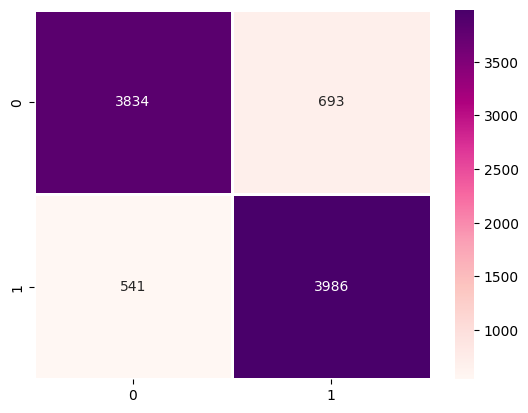

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

Confusion Matrix for the XGBoost model


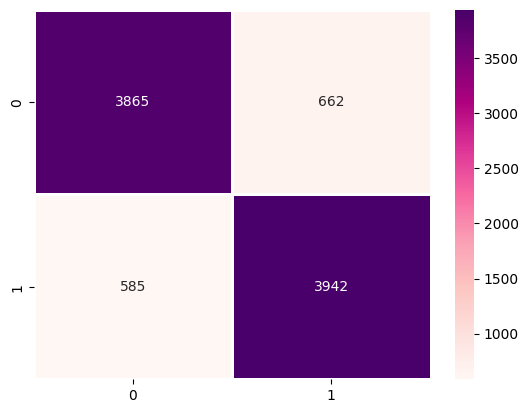

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 



precision    recall  f1_score  accuracy
model                                            
LightGBM   0.851891  0.880495  0.865957  0.863707
XGBoost    0.856212  0.870775  0.863432  0.862271

In [45]:
final_model_eval = model_evaluation(fit_models = select_models, X_test = smote_X, y_test = smote_y)
final_model_eval